# Sensitivity test on height estimation using perspective projection

In [34]:
import numpy as np
import matplotlib.pyplot as plt

### Set baseline/typical imaging parameters

In [35]:
# Camera parameters
sensor_size = 0.0088          # Sensor width in meters (e.g., 8.8 mm)
image_resolution = 2448      # Image resolution in pixels
baseline_focal = 0.0085        # Focal length in meters (8.5 mm)

# Baseline values
baseline_pixel = 70          # Vertical pixel difference (y direction)
baseline_distance = 20.0      # Distance to object in meters
baseline_pitch = 10         # Baseline pitch angle in degrees

# Percent error range (-10% to +10%)
percent_error_range = np.linspace(-20, 20, 50)

### Dependency of height difference on pixel differences (from segmentation), distance/depth to object, and focal length
- assuming zero pitch angle

In [36]:
def height_difference_with_pitch(pixel_diff, distance, focal_length, sensor_size, image_resolution, pitch_angle):
    """
    Compute height difference using perspective projection with pitch angle correction.
    
    Parameters:
    - pixel_diff: Pixel difference (Delta y) in pixels
    - distance: Horizontal distance (meters)
    - focal_length: Focal length (meters)
    - sensor_size: Sensor size (meters)
    - image_resolution: Image resolution (pixels)
    - pitch_angle: Pitch angle (degrees, positive downward)
    
    Returns:
    - Height difference in meters
    """
    pixel_scale = sensor_size / image_resolution  # Derive pixel scale (meters/pixel)
    pitch_correction = np.cos(np.radians(pitch_angle))  # cos(theta) correction
    return (distance * pixel_diff * pixel_scale) / (focal_length * pitch_correction)

def compute_height_diff_for_ranges(baseline_pixel, baseline_distance, baseline_focal, baseline_pitch,
                                    sensor_size, image_resolution, percent_error_range):
    """
    Compute parameter ranges and corresponding height difference.
    """
    # Percent errors converted to multipliers
    error_multipliers = 1 + percent_error_range / 100.0

    # Ranges of parameter values
    pixel_range = baseline_pixel * error_multipliers
    distance_range = baseline_distance * error_multipliers
    focal_range = baseline_focal * error_multipliers
    pitch_range=baseline_pitch*error_multipliers

    # Baseline height difference
    baseline_height = height_difference_with_pitch(baseline_pixel, baseline_distance, 
                                        baseline_focal, sensor_size, image_resolution,baseline_pitch)

    # # Absolute errors in height difference
    # height_error_pixel = [
    #     height_difference(p, baseline_distance, baseline_focal, sensor_size, image_resolution) - baseline_height
    #     for p in pixel_range
    # ]
    # height_error_distance = [
    #     height_difference(baseline_pixel, d, baseline_focal, sensor_size, image_resolution) - baseline_height
    #     for d in distance_range
    # ]
    # height_error_focal = [
    #     height_difference(baseline_pixel, baseline_distance, f, sensor_size, image_resolution) - baseline_height
    #     for f in focal_range
    # ]

    # Height difference
    height_diff_pixel = [
        height_difference_with_pitch(p, baseline_distance, baseline_focal, sensor_size, image_resolution,baseline_pitch)
        for p in pixel_range
    ]
    height_diff_distance = [
        height_difference_with_pitch(baseline_pixel, d, baseline_focal, sensor_size, image_resolution,baseline_pitch)
        for d in distance_range
    ]
    height_diff_focal = [
        height_difference_with_pitch(baseline_pixel, baseline_distance, f, sensor_size, image_resolution,baseline_pitch)
        for f in focal_range
    ]
    height_diff_pitch = [
        height_difference_with_pitch(baseline_pixel, baseline_distance, baseline_focal, sensor_size, image_resolution,t)
        for t in pitch_range
    ]

    return (pixel_range, height_diff_pixel, 
            distance_range, height_diff_distance, 
            focal_range, height_diff_focal, 
            pitch_range, height_diff_pitch,
            baseline_height)


Derived Pixel Scale: 0.000004 m/pixel
Baseline Height Difference: 0.60 m


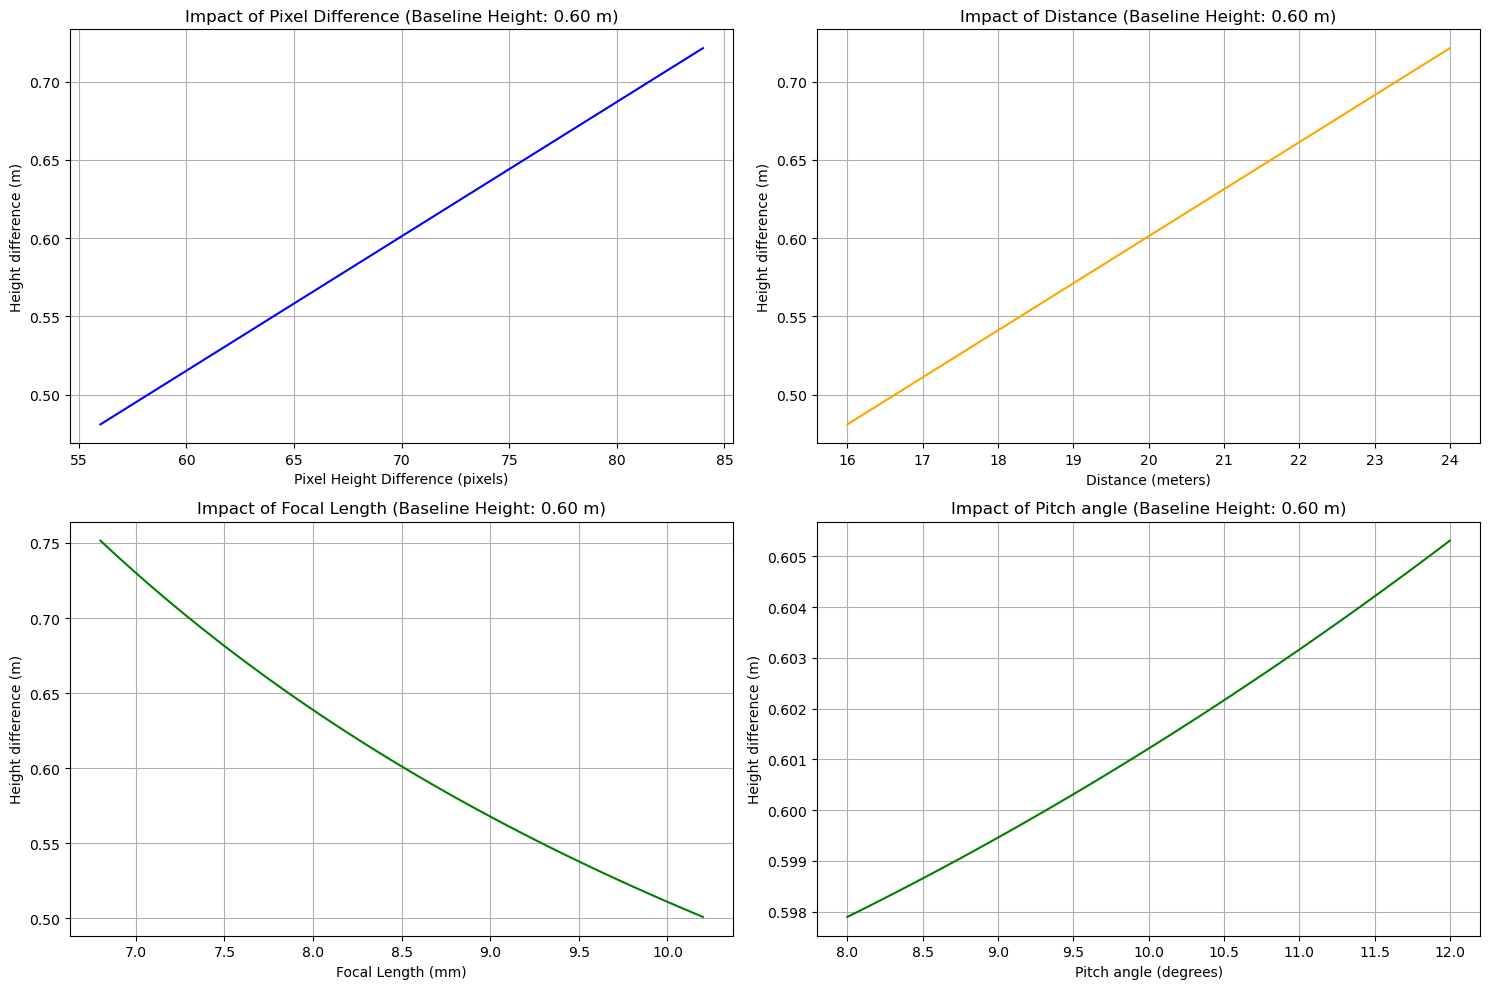

In [39]:
# Compute parameter ranges and height errors
(pixel_range, height_diff_pixel, 
 distance_range, height_diff_distance, 
 focal_range, height_diff_focal, 
 pitch_range, height_diff_pitch,
 baseline_height) = compute_height_diff_for_ranges(
    baseline_pixel, baseline_distance, baseline_focal, baseline_pitch, sensor_size, image_resolution, percent_error_range)

# Display Baseline
print(f"Derived Pixel Scale: {sensor_size / image_resolution:.6f} m/pixel")
print(f"Baseline Height Difference: {baseline_height:.2f} m")

# Plotting the parameter ranges vs height difference errors
plt.figure(figsize=(15, 10))

# Pixel height Difference
plt.subplot(2, 2, 1)
plt.plot(pixel_range, height_diff_pixel, label="Height Difference (m)", color="blue")
plt.xlabel("Pixel Height Difference (pixels)")
plt.ylabel("Height difference (m)")
plt.title(f"Impact of Pixel Difference (Baseline Height: {baseline_height:.2f} m)")
plt.grid(True)

# Distance
plt.subplot(2, 2, 2)
plt.plot(distance_range, height_diff_distance, label="Height Difference (m)", color="orange")
plt.xlabel("Distance (meters)")
plt.ylabel("Height difference (m)")
plt.title(f"Impact of Distance (Baseline Height: {baseline_height:.2f} m)")
plt.grid(True)

# Focal Length
plt.subplot(2, 2, 3)
plt.plot(focal_range*1000, height_diff_focal, label="Height Difference (m)", color="green")
plt.xlabel("Focal Length (mm)")
plt.ylabel("Height difference (m)")
plt.title(f"Impact of Focal Length (Baseline Height: {baseline_height:.2f} m)")
plt.grid(True)

# pitch angle
plt.subplot(2, 2, 4)
plt.plot(pitch_range, height_diff_pitch, label="Height Difference (m)", color="green")
plt.xlabel("Pitch angle (degrees)")
plt.ylabel("Height difference (m)")
plt.title(f"Impact of Pitch angle (Baseline Height: {baseline_height:.2f} m)")
plt.grid(True)

plt.tight_layout()
plt.show()


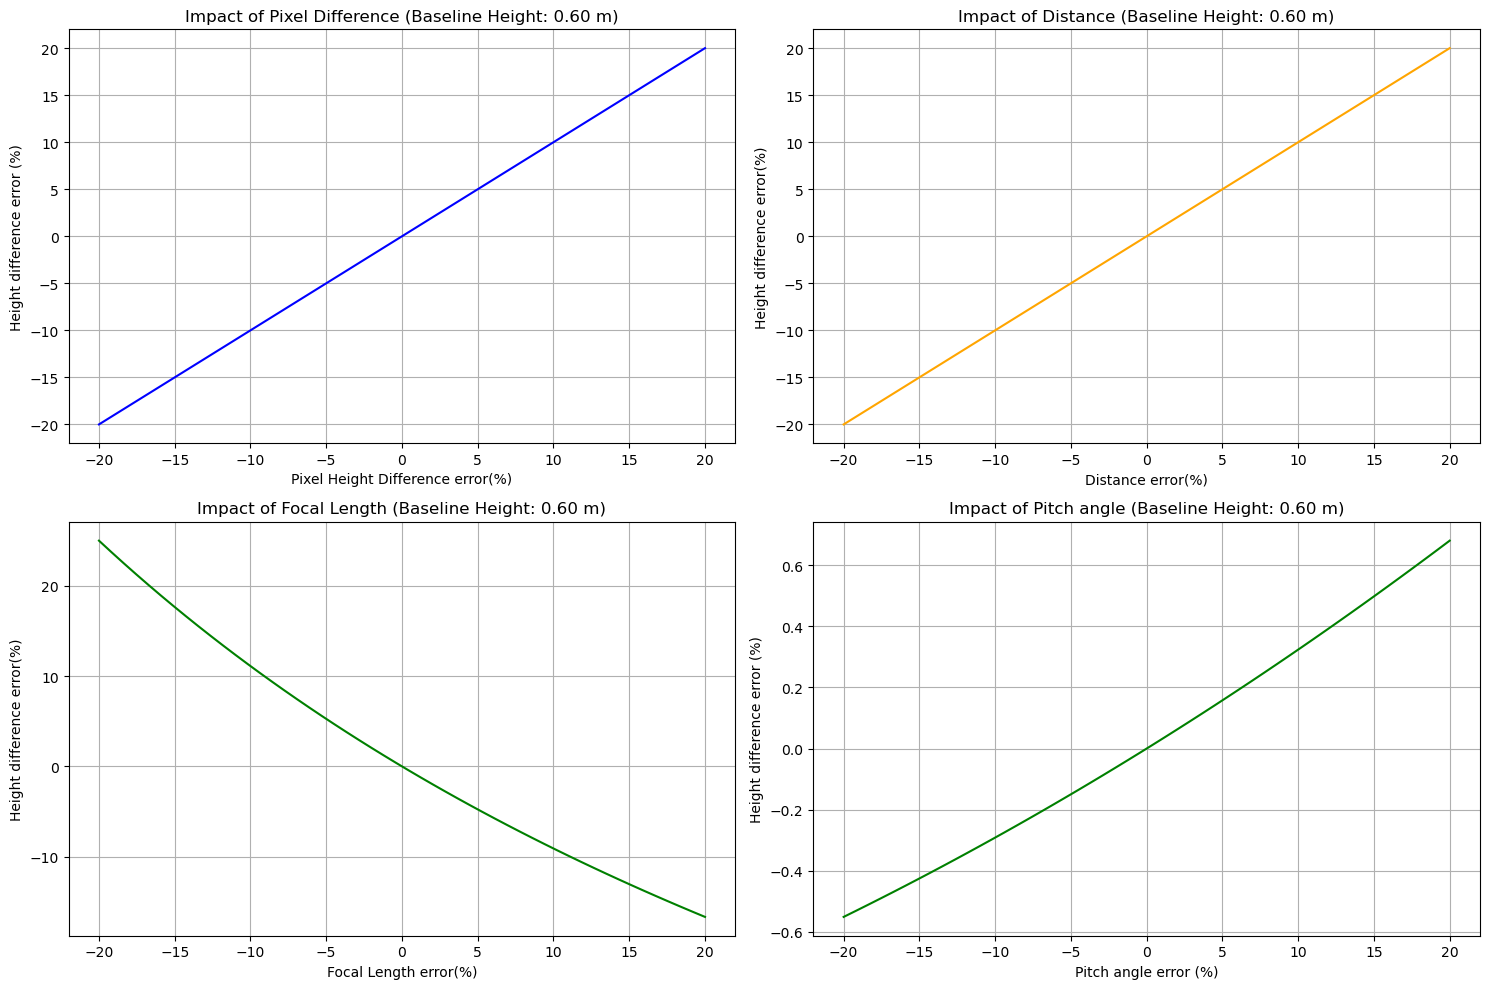

In [43]:
# Compute parameter ranges and height errors
height_diff_error_pixel=[(h-baseline_height)/baseline_height*100 for h in height_diff_pixel]
height_diff_error_distance=[(d-baseline_height)/baseline_height*100 for d in height_diff_distance]
height_diff_error_focal=[(f-baseline_height)/baseline_height*100 for f in height_diff_focal]
height_diff_error_pitch=[(t-baseline_height)/baseline_height*100 for t in height_diff_pitch]

# Plotting the parameter ranges vs height difference errors
plt.figure(figsize=(15, 10))

# Pixel height Difference
plt.subplot(2, 2, 1)
plt.plot(percent_error_range, height_diff_error_pixel, label="Height Difference error(%)", color="blue")
plt.xlabel("Pixel Height Difference error(%)")
plt.ylabel("Height difference error (%)")
plt.title(f"Impact of Pixel Difference (Baseline Height: {baseline_height:.2f} m)")
plt.grid(True)

# Distance
plt.subplot(2, 2, 2)
plt.plot(percent_error_range, height_diff_error_distance, label="Height Difference error(%)", color="orange")
plt.xlabel("Distance error(%)")
plt.ylabel("Height difference error(%)")
plt.title(f"Impact of Distance (Baseline Height: {baseline_height:.2f} m)")
plt.grid(True)

# Focal Length
plt.subplot(2, 2, 3)
plt.plot(percent_error_range, height_diff_error_focal, label="Height Difference error(%)", color="green")
plt.xlabel("Focal Length error(%)")
plt.ylabel("Height difference error(%)")
plt.title(f"Impact of Focal Length (Baseline Height: {baseline_height:.2f} m)")
plt.grid(True)

# pitch angle
plt.subplot(2, 2, 4)
plt.plot(percent_error_range, height_diff_error_pitch, label="Height Difference error(%)", color="green")
plt.xlabel("Pitch angle error (%)")
plt.ylabel("Height difference error (%)")
plt.title(f"Impact of Pitch angle (Baseline Height: {baseline_height:.2f} m)")
plt.grid(True)

plt.tight_layout()
plt.show()
